<a href="https://colab.research.google.com/github/RacheMorris16k/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [23]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
EIN,34299
NAME,19568
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value (e.g., less than 1000 occurrences)
classification_types_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1]


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < 1000].index


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [17]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=['IS_SUCCESSFUL', 'SPECIAL_CONSIDERATIONS_Y'])
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = X_train_scaled.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation='tanh', input_dim=input_dim))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='tanh'))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         4,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    validation_data=(X_test_scaled, y_test)
)

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7101 - loss: 0.5900 - val_accuracy: 0.7306 - val_loss: 0.5586
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7312 - loss: 0.5520 - val_accuracy: 0.7305 - val_loss: 0.5565
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7329 - loss: 0.5500 - val_accuracy: 0.7258 - val_loss: 0.5575
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7300 - loss: 0.5526 - val_accuracy: 0.7292 - val_loss: 0.5537
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7345 - loss: 0.5469 - val_accuracy: 0.7268 - val_loss: 0.5545
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7290 - loss: 0.5538 - val_accuracy: 0.7308 - val_loss: 0.5529
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7303 - loss: 0.5516 - val_accuracy: 0.7301 - val_loss: 0.5520
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7376 - loss: 0.5404 - val_accuracy: 0.

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - 6ms/step - accuracy: 0.7297 - loss: 0.5542
Loss: 0.5542225241661072, Accuracy: 0.72967928647995


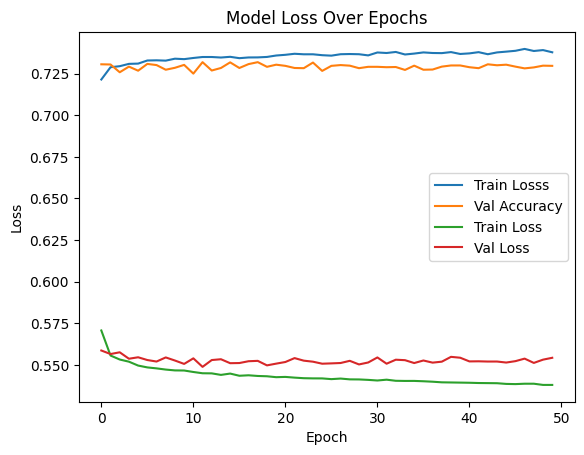

In [25]:
#Plot accuracy
plt.plot(fit_model.history['accuracy'], label='Train Losss')
plt.plot(fit_model.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show

#Plot loss
plt.plot(fit_model.history['loss'], label='Train Loss')
plt.plot(fit_model.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

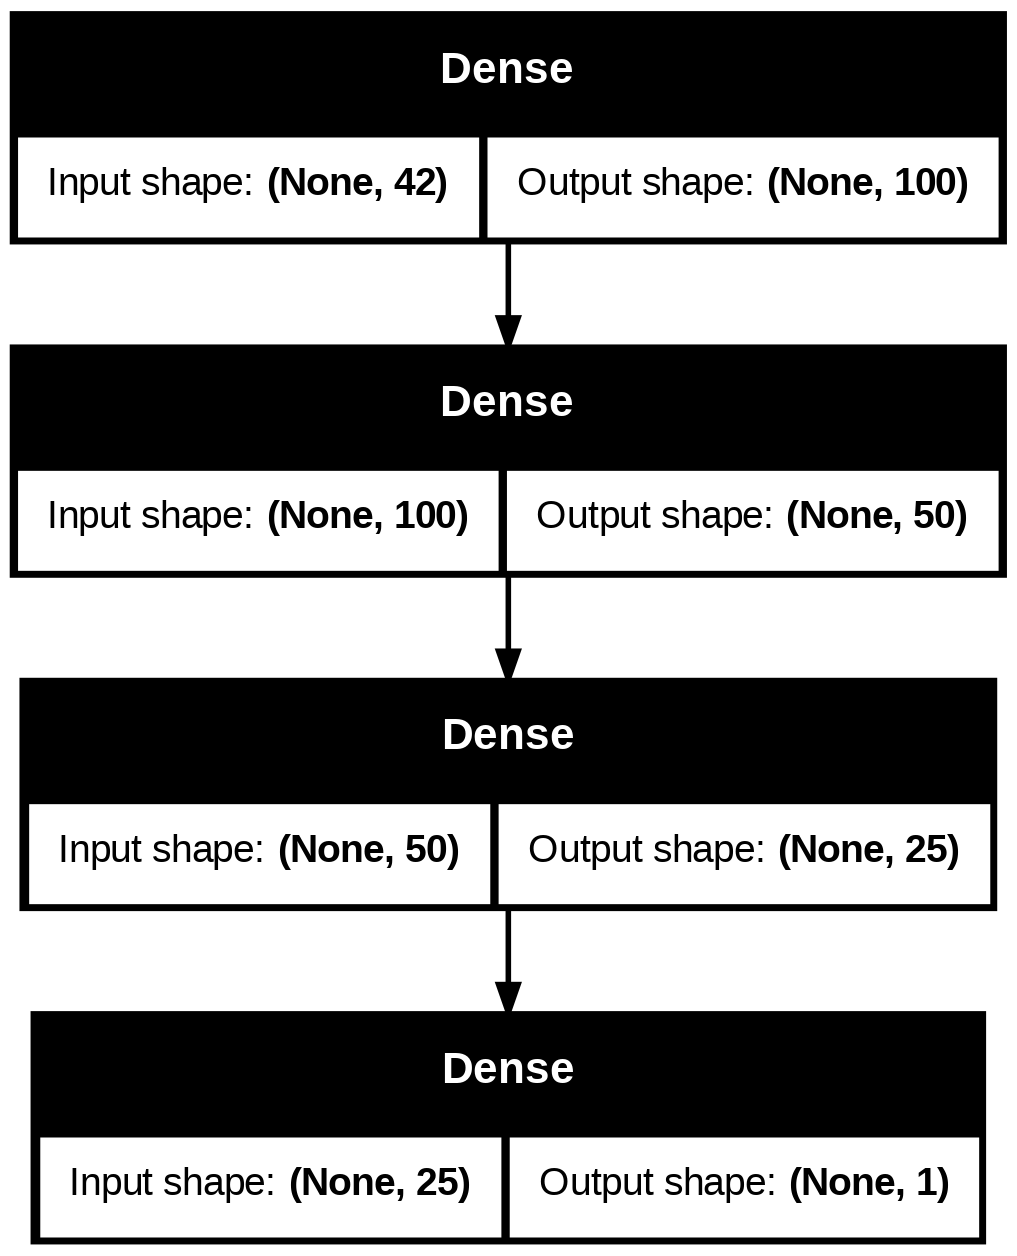

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(nn, to_file='model_architecture.png', show_shapes=True)


In [27]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")
